In [6]:
import keras
from keras import layers
from tensorflow import keras
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from keras import Sequential
%matplotlib inline

In [7]:
train_ds = keras.utils.image_dataset_from_directory('C:\\Users\\DELL-MCC\\Downloads\\Telegram Desktop\\ASS3 GANs\\train', image_size=(256,256))
test_ds = keras.utils.image_dataset_from_directory('C:\\Users\DELL-MCC\\Downloads\\Telegram Desktop\\ASS3 GANs\\test', image_size=(256,256))

Found 80 files belonging to 2 classes.
Found 20 files belonging to 2 classes.


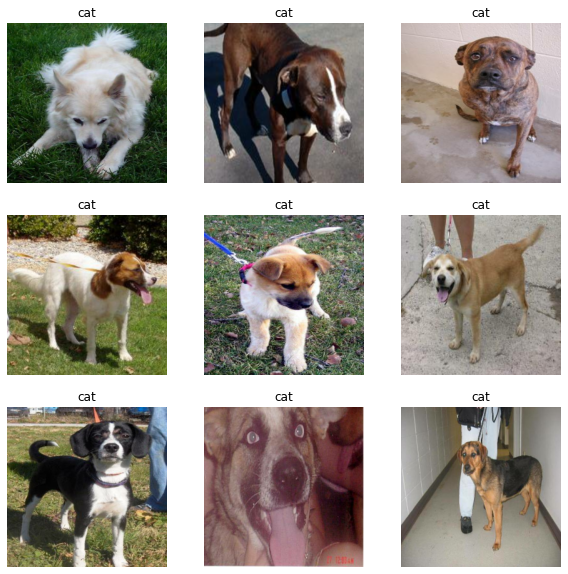

In [8]:
plt.figure(figsize=(10, 10))
train_x = np.zeros((80,256,256,3))
j=0
for images, labels in train_ds.take(3):
    siz = images.numpy().shape[0]
    train_x[j:siz+j] = images.numpy()
    j+=siz-1
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if labels[i] == 1:
            plt.title('cat')
        else:
            plt.title('dog')
        plt.axis("off")

plt.show()


test_x = np.zeros((20,256,256,3))
j=0
for images, labels in test_ds.take(1):
    siz = images.numpy().shape[0]
    test_x[j:siz+j] = images.numpy()
    j+=siz-1

plt.show()

In [9]:
test_x.shape

(20, 256, 256, 3)

In [10]:
model = Sequential()
model.add(layers.Input((256, 256, 3)))
model.add(layers.Conv2D(64 ,3 , padding="same", activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(128 ,3 , padding="same", activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(256 ,3 , padding="same", activation="relu"))

#Decoder
model.add(layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu"))
model.add(layers.Conv2DTranspose(64,3, strides=(2,2), padding="same",activation="relu"))
model.add(layers.Conv2D(3,3, padding="same",activation="sigmoid"))

model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_transpose (Conv2DTra  (None, 128, 128, 128)    2

In [11]:
trainx = train_x/255.
testx = test_x/255.

In [12]:
import numpy as np
from scipy.stats.kde import gaussian_kde
import matplotlib.pyplot as plt
# create gaussian noise
mean = 0
var = 0.1
sigma = np.sqrt(var)
n = np.random.normal(loc=mean, 
                     scale=sigma, 
                     size=(256,256,3))

In [13]:
model.fit(trainx+n,trainx,batch_size=1,epochs = 200)

Epoch 1/200
80/80 [==============================] - 29s 353ms/step - loss: 0.0230
Epoch 2/200
80/80 [==============================] - 30s 372ms/step - loss: 0.0108
Epoch 3/200
80/80 [==============================] - 48s 605ms/step - loss: 0.0081
Epoch 4/200
80/80 [==============================] - 49s 610ms/step - loss: 0.0070
Epoch 5/200
80/80 [==============================] - 48s 599ms/step - loss: 0.0055
Epoch 6/200
80/80 [==============================] - 52s 654ms/step - loss: 0.0054
Epoch 7/200
80/80 [==============================] - 52s 646ms/step - loss: 0.0049
Epoch 8/200
80/80 [==============================] - 50s 627ms/step - loss: 0.0047
Epoch 9/200
80/80 [==============================] - 50s 622ms/step - loss: 0.0046
Epoch 10/200
80/80 [==============================] - 49s 616ms/step - loss: 0.0048
Epoch 11/200
80/80 [==============================] - 50s 627ms/step - loss: 0.0043
Epoch 12/200
80/80 [==============================] - 49s 611ms/step - loss: 0.0043
E

80/80 [==============================] - 50s 631ms/step - loss: 0.0018
Epoch 195/200
80/80 [==============================] - 50s 628ms/step - loss: 0.0015
Epoch 196/200
80/80 [==============================] - 50s 629ms/step - loss: 0.0014
Epoch 197/200
80/80 [==============================] - 50s 623ms/step - loss: 0.0013
Epoch 198/200
80/80 [==============================] - 52s 645ms/step - loss: 0.0017
Epoch 199/200
80/80 [==============================] - 50s 627ms/step - loss: 0.0017
Epoch 200/200
80/80 [==============================] - 53s 662ms/step - loss: 0.0016


In [14]:
predict = model.predict(testx+n)

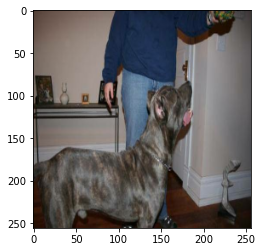

In [15]:
plt.imshow(testx[4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


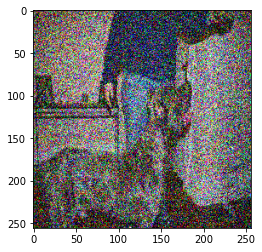

In [16]:
plt.imshow(testx[4]+n)

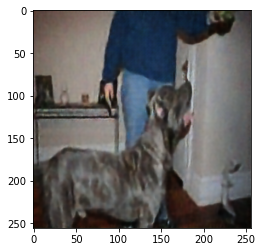

In [17]:
plt.imshow(predict[4])